In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from pandas import DataFrame
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
df_2018 = pd.read_csv('survey_results_public.csv')

#### Define dictionaries to make certain verbose data into concise definitions

In [3]:
student_dict = {
    'No': 'NO', 
    'Yes, full-time': 'FULL-TIME', 
    'Yes, part-time': 'PART-TIME',
}
# student_map = pd.DataFrame(data=student_original, columns=['Original', 'Modified'])

employment_dict = {
    'Employed full-time': 'FULL-TIME', 
    'Independent contractor, freelancer, or self-employed': 'CONTRACTOR', 
    'Not employed, but looking for work': 'LOOKING', 
    'Employed part-time': 'PART-TIME', 
    'Not employed, and not looking for work': 'NOT-LOOKING', 
    'Retired': 'RETIRED',
}

education_dict = {
    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'BACHELORS', 
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'MASTERS', 
    'Some college/university study without earning a degree': 'NO-DEGREE', 
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'SECONDARY', 
    'Associate degree': 'ASSOCIATE', 
    'Other doctoral degree (Ph.D, Ed.D., etc.)': 'DOCTORAL', 
    'Primary/elementary school': 'PRIMARY', 
    'Professional degree (JD, MD, etc.)': 'PROFESSIONAL', 
    'I never completed any formal education': 'NONE',
    'They never completed any formal education': 'NONE'
}
company_size_dict = {
    'Fewer than 10 employees': '<10', 
    '10 to 19 employees': '10-19', 
    '20 to 99 employees': '20-99',
    '100 to 499 employees': '100-499', 
    '500 to 999 employees': '500-999', 
    '1,000 to 4,999 employees': '1000-4999', 
    '5,000 to 9,999 employees': '5000-9999', 
    '10,000 or more employees': '>10000',
}

job_satisfaction_dict = {
    'Extremely dissatisfied': '1', 
    'Moderately dissatisfied': '2', 
    'Slightly dissatisfied': '3', 
    'Neither satisfied nor dissatisfied': '4', 
    'Slightly satisfied': '5', 
    'Moderately satisfied': '6', 
    'Extremely satisfied': '7',
}

last_new_job_dict = {
    "I've never had a job": '0',
    'Less than a year ago': '<1', 
    'Between 1 and 2 years ago': '1-2', 
    'Between 2 and 4 years ago': '2-4', 
    'More than 4 years ago': '>4', 
}

hours_computer_dict = {
    'Less than 1 hour': '<1',
    '1 - 4 hours': '1-4', 
    '5 - 8 hours': '5-8', 
    '9 - 12 hours': '9-12', 
    'Over 12 hours': '>12', 
}

hours_outside_dict = {
    'Less than 30 minutes': '<0.5',
    '30 - 59 minutes': '0.5-1',
    '1 - 2 hours': '1-2',
    '3 - 4 hours': '3-4',
    'Over 4 hours': '>4'
}

ai_dangerous_dict = {
    'Algorithms making important decisions': 'IMP-DECISIONS',
    'Artificial intelligence surpassing human intelligence ("the singularity")': 'SINGULARITY',
    'Evolving definitions of "fairness" in algorithmic versus human decisions': 'FAIRNESS-DEFINITION',
    'Increasing automation of jobs': 'AUTOMATION'
}

ai_responsible_dict = {
    'The developers or the people creating the AI': 'DEVELOPERS',
    'A governmental or other regulatory body': 'GOVT',
    'Prominent industry leaders': 'LEADERS',
    'Nobody': 'NOBODY'
}

ai_future_dict = {
    "I'm excited about the possibilities more than worried about the dangers.": 'EXCITED',
    "I'm worried about the dangers more than I'm excited about the possibilities.": 'WORRIED',
    "I don't care about it, or I haven't thought about it.": 'NO-COMMENTS'
}

exercise_dict = {
    "1 - 2 times per week" : '2',        
    "3 - 4 times per week" : '4',        
    'Daily or almost every day': '7',
    "I don't typically exercise" : '0'
}


#### Define function to identify if the undergrad course was related to computer science

In [4]:
courses = ['computer', 'software', 'information']
def has_software(_undergrad: str) -> bool:
    if _undergrad is None:
        return False
    return any(ext in _undergrad.lower() for ext in courses)

#### Extract the important columns into a separate dataset

In [5]:
imp_cols = ['Student', 'FormalEducation', 'EducationParents', 'UndergradMajor',
            'Employment', 'CompanySize', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
            'HoursComputer', 'HoursOutside','AIDangerous', 'AIInteresting', 'AIResponsible', 
            'AIFuture','Exercise','ConvertedSalary', 'Salary/bonus','Stockoptions','HealthInsurance',
            'Parentalleave','wellnessbenefit', 'pensionsavings', 'Company-providedmeals','officeequipmentallowance',
            'Childcarebenefit','Transportationbenefit','Conference/educationbudget']

master_imp: DataFrame = df_2018[imp_cols]

In [47]:
master_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 28 columns):
Student                       94901 non-null object
FormalEducation               94703 non-null object
EducationParents              61813 non-null object
UndergradMajor                79036 non-null object
Employment                    95321 non-null object
CompanySize                   71531 non-null object
JobSatisfaction               69276 non-null object
CareerSatisfaction            76504 non-null object
LastNewJob                    78889 non-null object
HoursComputer                 72133 non-null object
HoursOutside                  72024 non-null object
AIDangerous                   63115 non-null object
AIInteresting                 65367 non-null object
AIResponsible                 65553 non-null object
AIFuture                      69728 non-null object
Exercise                      72108 non-null object
ConvertedSalary               47702 non-null float64
Salary

In [27]:
null_counts = master_imp.isnull().sum().sort_values(ascending = False)
null_counts

ConvertedSalary               51153
EducationParents              37042
AIDangerous                   35740
Conference/educationbudget    33938
Childcarebenefit              33937
officeequipmentallowance      33937
Company-providedmeals         33937
pensionsavings                33937
wellnessbenefit               33937
Parentalleave                 33937
HealthInsurance               33937
Stockoptions                  33937
Salary/bonus                  33937
Transportationbenefit         33937
AIInteresting                 33488
AIResponsible                 33302
JobSatisfaction               29579
AIFuture                      29127
CompanySize                   27324
HoursOutside                  26831
Exercise                      26747
HoursComputer                 26722
CareerSatisfaction            22351
LastNewJob                    19966
UndergradMajor                19819
FormalEducation                4152
Student                        3954
Employment                  

#### impute missing values

In [6]:
# master_imp = master_imp.replace(np.nan, '', regex=True)
num_cols = master_imp.select_dtypes(include=['float','int']).columns

for col in imp_cols:
    if col in num_cols:
        master_imp[col].fillna(master_imp[col].mean(), inplace=True)
    elif master_imp[col].isnull().sum() > 10000:
        master_imp[col].fillna('x', inplace=True)
    else:
        master_imp[col].fillna(master_imp[col].mode()[0], inplace=True)

#### Replace the verbose definitions with the concise data dictionary values

In [7]:
master_imp = master_imp.replace({
    'Student': student_dict,
    'Employment': employment_dict,
    'FormalEducation': education_dict, 
    'CompanySize': company_size_dict,
    'JobSatisfaction': job_satisfaction_dict,
    'CareerSatisfaction': job_satisfaction_dict,
    'LastNewJob': last_new_job_dict,
    'HoursComputer': hours_computer_dict,
    'HoursOutside': hours_outside_dict,
    'EducationParents': education_dict,
    'AIDangerous': ai_dangerous_dict,
    'AIInteresting': ai_dangerous_dict,
    'AIResponsible': ai_responsible_dict,
    'AIFuture': ai_future_dict,
    'Exercise': exercise_dict
})

master_imp['Studied_Software'] = master_imp['UndergradMajor'].map(has_software)
master_imp.drop(columns=['UndergradMajor'], inplace=True)

In [8]:
categorical_cols = master_imp.select_dtypes(include=['object']).columns.tolist()
categorical_cols.append('Studied_Software')

for col in categorical_cols:
    master_imp[col] = pd.Categorical(master_imp[col])

master_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 28 columns):
Student                       98855 non-null category
FormalEducation               98855 non-null category
EducationParents              98855 non-null category
Employment                    98855 non-null category
CompanySize                   98855 non-null category
JobSatisfaction               98855 non-null category
CareerSatisfaction            98855 non-null category
LastNewJob                    98855 non-null category
HoursComputer                 98855 non-null category
HoursOutside                  98855 non-null category
AIDangerous                   98855 non-null category
AIInteresting                 98855 non-null category
AIResponsible                 98855 non-null category
AIFuture                      98855 non-null category
Exercise                      98855 non-null category
ConvertedSalary               98855 non-null float64
Salary/bonus                

In [10]:
X_ = master_imp.drop(['JobSatisfaction'], axis=1)
y_ = master_imp[['JobSatisfaction']]

#### Dummy coding

In [11]:
X_coded = X_.apply(le.fit_transform)

#### feature selection

[0.02001435 0.03501684 0.03398883 0.04798066 0.05985422 0.1484073
 0.07873887 0.0371344  0.03126934 0.03564701 0.0271892  0.03727165
 0.02701873 0.0317298  0.03814643 0.017669   0.03354654 0.02724419
 0.02780459 0.02888079 0.02652625 0.02759844 0.02764335 0.02549499
 0.02792393 0.02700927 0.01325102]


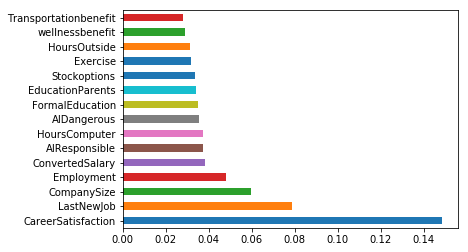

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_coded,y_)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_coded.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### build model

In [13]:
y_col = master_imp[['JobSatisfaction']]
x_col = master_imp[['ConvertedSalary','HoursOutside','CareerSatisfaction','FormalEducation','CompanySize',
              'LastNewJob','Employment','EducationParents', 'officeequipmentallowance', 'HoursComputer',
               'Conference/educationbudget','AIFuture','Exercise','Transportationbenefit','Company-providedmeals']]
#[x for x in categorical_cols if x != ('JobSatisfaction'or'AIDangerous'or'AIInteresting'or'AIResponsible'or'AIFuture')]

master_coded = pd.get_dummies(x_col)
master_coded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 74 columns):
ConvertedSalary                  98855 non-null float64
officeequipmentallowance         98855 non-null float64
Conference/educationbudget       98855 non-null float64
Transportationbenefit            98855 non-null float64
Company-providedmeals            98855 non-null float64
HoursOutside_0.5-1               98855 non-null uint8
HoursOutside_1-2                 98855 non-null uint8
HoursOutside_3-4                 98855 non-null uint8
HoursOutside_<0.5                98855 non-null uint8
HoursOutside_>4                  98855 non-null uint8
HoursOutside_x                   98855 non-null uint8
CareerSatisfaction_1             98855 non-null uint8
CareerSatisfaction_2             98855 non-null uint8
CareerSatisfaction_3             98855 non-null uint8
CareerSatisfaction_4             98855 non-null uint8
CareerSatisfaction_5             98855 non-null uint8
CareerSatisfactio

In [14]:
master_coded.to_pickle('./master-coded.pickle')
print('DataFrame stored in pickle file...')

DataFrame stored in pickle file...


In [15]:
X_train, X_test, y_train, y_test = train_test_split(master_coded, y_col, test_size=0.33, random_state=42)

In [16]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train) 

# Step 3: How well does it predict?

y_pred = model_dt.predict(X_test)


In [17]:
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred, average="macro"))
print("Precision: %0.2f" %precision_score(y_test,y_pred, average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.51
Precision: 0.33
Precision: 0.33
Recall:  0.33


In [18]:
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.20      0.20      0.20       819
           2       0.21      0.23      0.22      2034
           3       0.16      0.17      0.16      2327
           4       0.13      0.13      0.13      1665
           5       0.18      0.18      0.18      3302
           6       0.45      0.44      0.45      8706
           7       0.35      0.35      0.35      4078
           x       0.98      0.97      0.98      9692

   micro avg       0.51      0.51      0.51     32623
   macro avg       0.33      0.33      0.33     32623
weighted avg       0.51      0.51      0.51     32623



### Navie Bayes

In [19]:
model_nb = BernoulliNB()

model_nb.fit(X_train, y_train) 

# Step 3: How well does it predict?

y_pred = model_nb.predict(X_test)

In [20]:
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %0.2f" %f1_score(y_test, y_pred, average="macro"))
print("Precision: %0.2f" %precision_score(y_test,y_pred, average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.55
F1 score: 0.39
Precision: 0.41
Recall:  0.38


In [21]:
rft = RandomForestClassifier()

rft.fit(X_train,y_train)

y_pred = rft.predict(X_test)

In [22]:
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %0.2f" %f1_score(y_test, y_pred, average="macro"))
print("Precision: %0.2f" %precision_score(y_test,y_pred, average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.56
F1 score: 0.37
Precision: 0.39
Recall:  0.37


### dummy coding AI

In [23]:
X = master_imp.drop(['AIFuture'],axis=1)
y = master_imp[['AIFuture']]

In [24]:
X_coded = X.apply(le.fit_transform)

#### feature selection

[0.01320022 0.02291224 0.08273786 0.01419706 0.0256288  0.02620877
 0.03811901 0.04020968 0.05490341 0.04008358 0.03313996 0.18472648
 0.10937677 0.06731301 0.02315645 0.01327422 0.02000819 0.02349385
 0.0182745  0.01847272 0.0230579  0.02048131 0.01945061 0.01809101
 0.01979052 0.01975736 0.00993448]


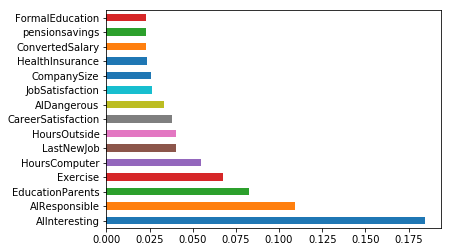

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_coded,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_coded.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [26]:
X = master_imp.drop(['Employment','JobSatisfaction', 'AIFuture', 'CareerSatisfaction', 'LastNewJob','HoursComputer', 
                     'HoursOutside','Exercise','Salary/bonus','Stockoptions','HealthInsurance', 'Parentalleave','wellnessbenefit', 'pensionsavings',
        'Company-providedmeals','officeequipmentallowance', 'Childcarebenefit','Transportationbenefit',
                     'Conference/educationbudget','ConvertedSalary'],axis=1)
y = master_imp[['AIFuture']]

In [27]:
X_col_2 = pd.get_dummies(X)
X_col_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 48 columns):
Student_FULL-TIME                    98855 non-null uint8
Student_NO                           98855 non-null uint8
Student_PART-TIME                    98855 non-null uint8
FormalEducation_ASSOCIATE            98855 non-null uint8
FormalEducation_BACHELORS            98855 non-null uint8
FormalEducation_DOCTORAL             98855 non-null uint8
FormalEducation_MASTERS              98855 non-null uint8
FormalEducation_NO-DEGREE            98855 non-null uint8
FormalEducation_NONE                 98855 non-null uint8
FormalEducation_PRIMARY              98855 non-null uint8
FormalEducation_PROFESSIONAL         98855 non-null uint8
FormalEducation_SECONDARY            98855 non-null uint8
EducationParents_ASSOCIATE           98855 non-null uint8
EducationParents_BACHELORS           98855 non-null uint8
EducationParents_DOCTORAL            98855 non-null uint8
EducationParents_MAST

### run model

In [28]:
def run_classification_for_model(_model, _x_train, _x_test, _y_train, _y_test) -> None:
    _model.fit(_x_train, _y_train)
    _y_pred = _model.predict(_x_test)

    print("Accuracy: %0.2f" %accuracy_score(_y_test, _y_pred))
    print("Precision: %0.2f" %precision_score(_y_test, _y_pred, average="macro"))
    print("Recall:  %0.2f" %recall_score(_y_test, _y_pred, average="macro"))
    print("F1-score:  %0.2f" %f1_score(_y_test, _y_pred, average="macro"))

    print(confusion_matrix(_y_test, _y_pred))
    print(classification_report(_y_test, _y_pred))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_col_2, y, test_size=0.33, random_state=42)

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

     EXCITED       0.74      0.97      0.84     16749
 NO-COMMENTS       0.57      0.00      0.00      1914
     WORRIED       0.50      0.05      0.10      4394
           x       0.94      0.98      0.96      9566

   micro avg       0.79      0.79      0.79     32623
   macro avg       0.69      0.50      0.47     32623
weighted avg       0.75      0.79      0.72     32623



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16284     1   171   293]
 [ 1714     4    55   141]
 [ 3992     1   232   169]
 [  155     1     2  9408]]


### Navie Bayes

In [33]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

#fit your classifier to training set
nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [34]:
y_pred = nb.predict(X_test)

print('Accuracy of Navie Bayes on test set: {:.2f}'.format(nb.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy of Navie Bayes on test set: 0.79
              precision    recall  f1-score   support

     EXCITED       0.72      0.98      0.83     16749
 NO-COMMENTS       0.42      0.02      0.04      1914
     WORRIED       0.47      0.04      0.08      4394
           x       0.96      0.95      0.96      9566

   micro avg       0.79      0.79      0.79     32623
   macro avg       0.64      0.50      0.48     32623
weighted avg       0.74      0.79      0.72     32623



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16382    43   154   170]
 [ 1713    44    43   114]
 [ 4102    13   187    92]
 [  422     4    16  9124]]


#### data visualiazation


In [36]:
print(df_2018['Hobby'].value_counts())

Yes    79897
No     18958
Name: Hobby, dtype: int64


In [37]:
Gender_2018 = [lang for sublist in [str(langs).replace(" ", "").split(";") 
                  for langs in df_2018['Gender']] for lang in sublist]

In [38]:
Gender_2018 = pd.Series(Gender_2018)
Gender_2018.value_counts()

Male                                             59785
nan                                              34386
Female                                            4409
Non-binary,genderqueer,orgendernon-conforming      595
Transgender                                        423
dtype: int64

In [39]:
data = df_2018[['Hobby','Gender']].dropna()
data = df_2018.loc[(df_2018['Hobby']=='Yes')] 
data.groupby('Hobby')['Gender'].value_counts()

Hobby  Gender                                                                   
Yes    Male                                                                         49258
       Female                                                                        2697
       Non-binary, genderqueer, or gender non-conforming                              242
       Female;Transgender                                                             127
       Male;Non-binary, genderqueer, or gender non-conforming                         112
       Transgender                                                                     89
       Female;Male                                                                     78
       Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       45
       Transgender;Non-binary, genderqueer, or gender non-conforming                   44
       Female;Non-binary, genderqueer, or gender non-conforming                        36
       Male;Transge

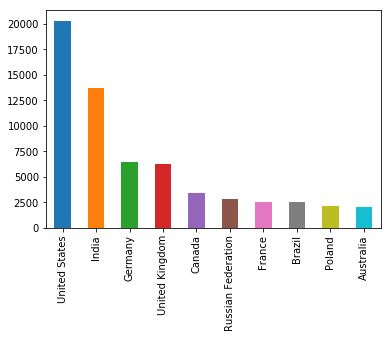

In [41]:
df_2018['Country'].value_counts()[0:10].plot(kind='bar',figsize=(6,4))

In [42]:
languages_2018 = [lang for sublist in [str(langs).replace(" ", "").split(";") 
                  for langs in df_2018['LanguageWorkedWith']] for lang in sublist]
languages_2018 = pd.Series(languages_2018)

In [43]:
languages_2018.count()

506189

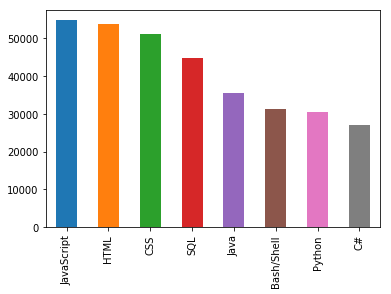

In [44]:
languages_2018.value_counts()[0:8].plot(kind='bar',figsize=(6,4))

In [45]:
languages_2018_want_to_work = [lang for sublist in [str(langs).replace(" ", "").split(";") 
                  for langs in df_2018['LanguageDesireNextYear']] for lang in sublist]
languages_2018_want_to_work = pd.Series(languages_2018_want_to_work)

In [46]:
languages_2018_want_to_work.value_counts()[0:8]

JavaScript    38465
Python        32795
HTML          31789
CSS           30199
SQL           28011
nan           25611
Java          22556
Bash/Shell    20751
dtype: int64

In [47]:
df_2018.groupby('AIDangerous')['AIDangerous'].count()

AIDangerous
Algorithms making important decisions                                        18020
Artificial intelligence surpassing human intelligence ("the singularity")    17645
Evolving definitions of "fairness" in algorithmic versus human decisions     14958
Increasing automation of jobs                                                12492
Name: AIDangerous, dtype: int64

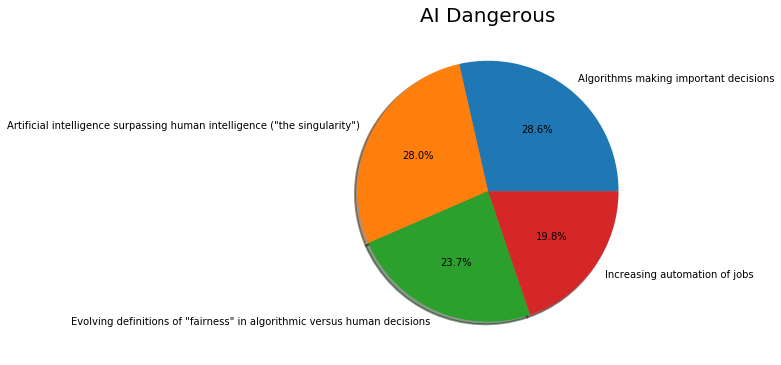

In [48]:
plt.figure(figsize=(6,6))
df_2018["AIDangerous"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=10,
                                              wedgeprops={"linewidth":2},shadow =True)
my_circ = plt.Circle((0,0),.7,color="white")
#plt.gca().add_artist(my_circ)
plt.ylabel("")
plt.title("AI Dangerous",fontsize=20)
plt.show()

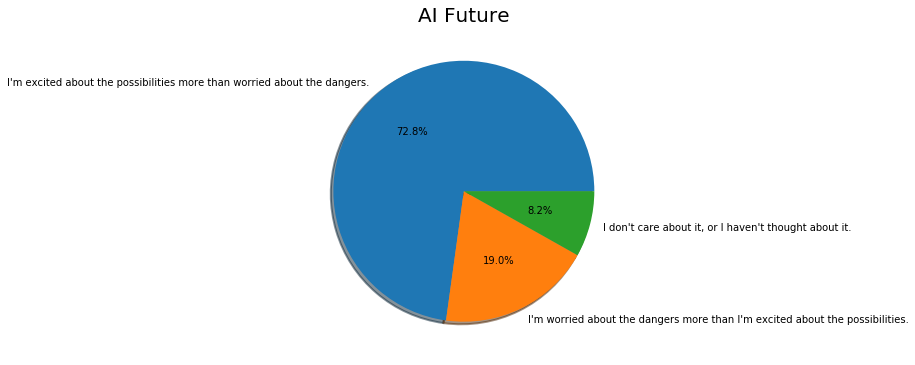

In [49]:
plt.figure(figsize=(6,6))
df_2018["AIFuture"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=10,
                                              wedgeprops={"linewidth":2},shadow =True)
my_circ = plt.Circle((0,0),.7,color="white")
#plt.gca().add_artist(my_circ)
plt.ylabel("")
plt.title("AI Future",fontsize=20)
plt.show()

In [50]:
date_int = ['FormalEducation',"CareerSatisfaction"]

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_2018[date_int[0]], df_2018[date_int[1]], normalize='index').style.background_gradient(cmap = cm)

CareerSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
FormalEducation,,,,,,,
Associate degree,0.0382166,0.220382,0.0679406,0.340977,0.0874735,0.0781316,0.166879
"Bachelor’s degree (BA, BS, B.Eng., etc.)",0.0325201,0.187558,0.0690737,0.368561,0.0718187,0.0879247,0.182544
I never completed any formal education,0.12766,0.21513,0.0874704,0.217494,0.115839,0.0969267,0.13948
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",0.0313567,0.172433,0.0693148,0.388573,0.0697132,0.0877532,0.180856
"Other doctoral degree (Ph.D, Ed.D., etc.)",0.0220963,0.208499,0.0651558,0.443626,0.0640227,0.0668555,0.129745
Primary/elementary school,0.0609884,0.198738,0.06204,0.256572,0.241851,0.0599369,0.119874
"Professional degree (JD, MD, etc.)",0.0438842,0.193277,0.0905696,0.338936,0.0718954,0.101774,0.159664
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.0319431,0.191493,0.0635551,0.327375,0.147799,0.0741476,0.163688
Some college/university study without earning a degree,0.0374105,0.189655,0.0671221,0.352093,0.0846888,0.091954,0.177077


In [51]:
#df_2018['Gender']=df_2018['Gender'].fillna('Others')

In [52]:
#df_2018.loc[(df_2018["Gender"]!= 'Male') & (df_2018["Gender"]!='Female'), "Gender"]='Others'

In [53]:
#t_2018=df_2018['JobSatisfaction'].value_counts()

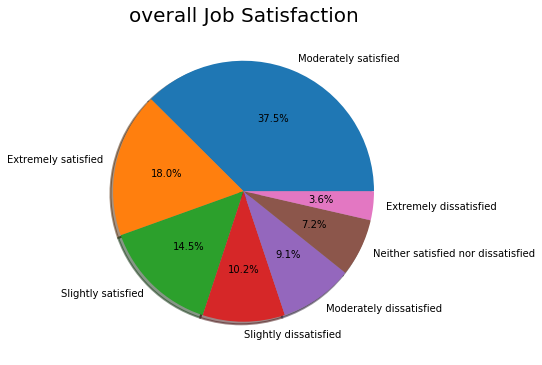

In [54]:
plt.figure(figsize=(6,6))
df_2018["JobSatisfaction"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=10,
                                              wedgeprops={"linewidth":2},shadow =True)
my_circ = plt.Circle((0,0),.7,color="white")
#plt.gca().add_artist(my_circ)
plt.ylabel("")
plt.title("overall Job Satisfaction",fontsize=20)
plt.show()